In [23]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from keras.datasets import mnist
from PIL import Image,ImageOps
import gradio as gr
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [24]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs available are" , len(physical_devices))
#tf.config.experimentaal.set_memory_growth(physical_devices[0],True)

Num of GPUs available are 0


In [25]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [26]:
len(x_train)

60000

In [27]:
y_train.dtype

dtype('uint8')

In [28]:
len(x_test)

10000

In [29]:
x_train[0].shape

(28, 28)

In [30]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

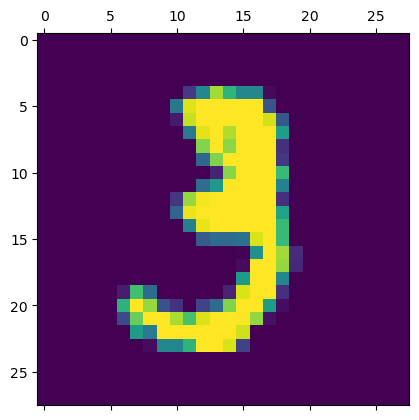

In [31]:
plt.matshow(x_train[10])
plt.show()

In [36]:
x_train_flatten = x_train.reshape(len(x_train),28*28)/255.0
x_test_flatten = x_test.reshape(len(x_test),28*28)/255.0

In [37]:
x_train_flatten.shape

(60000, 784)

In [38]:
x_test_flatten.shape

(10000, 784)

In [39]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
model = Sequential([
    Dense(units = 128,input_shape = (784,),activation = 'relu'),
    Dense(units = 10,activation = 'softmax')
])

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [43]:
model.fit(x = x_train_flatten,y = y_train,shuffle = True,validation_split = 0.1,batch_size = 20,epochs = 5,verbose = 2)

Epoch 1/5
2700/2700 - 6s - 2ms/step - accuracy: 0.8536 - loss: 0.5748 - val_accuracy: 0.9310 - val_loss: 0.2587
Epoch 2/5
2700/2700 - 5s - 2ms/step - accuracy: 0.9216 - loss: 0.2827 - val_accuracy: 0.9432 - val_loss: 0.2064
Epoch 3/5
2700/2700 - 4s - 2ms/step - accuracy: 0.9354 - loss: 0.2315 - val_accuracy: 0.9538 - val_loss: 0.1724
Epoch 4/5
2700/2700 - 5s - 2ms/step - accuracy: 0.9444 - loss: 0.1974 - val_accuracy: 0.9587 - val_loss: 0.1553
Epoch 5/5
2700/2700 - 4s - 2ms/step - accuracy: 0.9515 - loss: 0.1718 - val_accuracy: 0.9628 - val_loss: 0.1390


In [44]:
prediction = model.predict(x = x_test_flatten,verbose = 0)

In [45]:
cm = confusion_matrix(y_true = y_test,y_pred = np.argmax(prediction,axis=1))

In [46]:
def plot_confusion_matrix(cm,classes,normalize = False,title = "confusion matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment = "center",color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion matrix, without normalization
[[ 963    0    1    1    0    3    7    3    2    0]
 [   0 1117    4    1    0    1    3    2    7    0]
 [   3    2  983    9    5    0    6    7   16    1]
 [   0    1   14  962    0    7    1   10   12    3]
 [   1    1    6    0  947    0    6    3    4   14]
 [   7    1    0   24    3  823   13    2   15    4]
 [   7    3    2    1    6    8  927    1    3    0]
 [   1    9   19    6    6    1    0  973    2   11]
 [   4    5    5   18    8    5    8   10  910    1]
 [   9    6    1   12   31    2    1   10    7  930]]


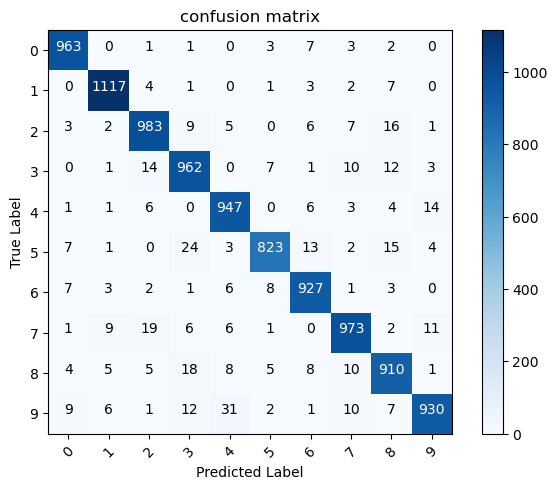

In [49]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm = cm , classes = cm_plot_labels)